In [1]:
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.cs_vqe_tools as cs_tools
import utils.plotting_tools as plot
import utils.molecule_tools as mol
import utils.linalg_tools as la
from matplotlib import pyplot as plt
import numpy as np

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


In [2]:
atoms = ['He', 'H']
bond_len = 0.772 #BeH:1.342396
multiplicity = 1
charge = 1
basis = '3-21g'

molecule = mol.construct_molecule(atoms, bond_len, multiplicity, charge, basis)
ham   = molecule['hamiltonian']
uccsd = molecule['uccsdansatz']
num_qubits = molecule['num_qubits']
num_electrons = molecule['num_electrons']

print('Species name:', molecule['speciesname'])
print('Hamiltonian:',  ham)
print('UCCSD Ansatz:', uccsd)

Species name: He1_H1_3-21g
Hamiltonian: {'IIIIIIII': (1.132443402106939+0j), 'ZIIIIIII': (0.13990631760825123+0j), 'YZYIIIII': (0.0025779051793704717+0j), 'XZXIIIII': (0.0025779051793704717+0j), 'YZZZYIII': (0.05776205910142785+0j), 'XZZZXIII': (0.05776205910142785+0j), 'YZZZZZYI': (-0.038660706668637024+0j), 'XZZZZZXI': (-0.038660706668637024+0j), 'IZIIIIII': (0.1399063176082515+0j), 'IYZYIIII': (0.0025779051793704613+0j), 'IXZXIIII': (0.0025779051793704613+0j), 'IYZZZYII': (0.05776205910142785+0j), 'IXZZZXII': (0.05776205910142785+0j), 'IYZZZZZY': (-0.03866070666863701+0j), 'IXZZZZZX': (-0.03866070666863701+0j), 'IIZIIIII': (-0.24607368520018313+0j), 'IIYZYIII': (0.06155545924339214+0j), 'IIXZXIII': (0.06155545924339214+0j), 'IIYZZZYI': (0.020218321802463655+0j), 'IIXZZZXI': (0.020218321802463655+0j), 'IIIZIIII': (-0.24607368520018308+0j), 'IIIYZYII': (0.061555459243392126+0j), 'IIIXZXII': (0.061555459243392126+0j), 'IIIYZZZY': (0.02021832180246367+0j), 'IIIXZZZX': (0.020218321802463

In [3]:
terms_noncon = cs_tools.greedy_dfs(ham, 3, criterion='weight')[-1]
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian=ham,
                                  terms_noncon=terms_noncon,
                                  num_qubits=num_qubits,
                                  num_electrons=num_electrons, 
                                  rot_A=True)

In [4]:
mol_circ.reference_state()

'00010010'

In [5]:
mol_circ.G

{'ZIIIIIII': 1.0,
 'IZIIIIII': 1.0,
 'IIZIIIII': 1.0,
 'IIIZIIII': -1.0,
 'IIIIZIII': 1.0,
 'IIIIIZII': 1.0,
 'IIIIIIIZ': 1.0}

In [6]:
la.noncon_projector(mol_circ.reference_state(), [0,3], num_qubits)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
uccsd

{'YZXIIIII': 0.006360390047795447j,
 'XZYIIIII': -0.006360390047795447j,
 'YYYXIIII': -0.006478936130101781j,
 'YXYYIIII': 0.006478936130101781j,
 'XXYXIIII': 0.006478936130101781j,
 'XYYYIIII': 0.006478936130101781j,
 'YXXXIIII': -0.006478936130101781j,
 'YYXYIIII': -0.006478936130101781j,
 'XYXXIIII': -0.006478936130101781j,
 'XXXYIIII': 0.006478936130101781j,
 'IYZXIIII': 0.006360390047795447j,
 'IXZYIIII': -0.006360390047795447j,
 'YZZZXIII': 0.002645411873728495j,
 'XZZZYIII': -0.002645411873728495j,
 'YYIIYXII': -0.0020562744029716928j,
 'YXIIYYII': 0.0020562744029716928j,
 'XXIIYXII': 0.0020562744029716928j,
 'XYIIYYII': 0.0020562744029716928j,
 'YXIIXXII': -0.0020562744029716928j,
 'YYIIXYII': -0.0020562744029716928j,
 'XYIIXXII': -0.0020562744029716928j,
 'XXIIXYII': 0.0020562744029716928j,
 'IYZZZXII': 0.002645411873728495j,
 'IXZZZYII': -0.002645411873728495j,
 'YZZZZZXI': -0.0009221551709259055j,
 'XZZZZZYI': 0.0009221551709259055j,
 'YYIIIIYX': -0.0050832831914165155j,
 'Y

In [8]:
from qiskit.circuit import Parameter

In [9]:
nc_state = '011'
n_q=3
sim_indices = [1]
proj = la.noncon_projector(nc_state, sim_indices, n_q)
exp = la.exp_pauli('ZXZ', 1)
proj

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
out = np.array(proj*exp)
out

array([[0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.54030231+0.j        ,
        0.        +0.j        , 0.        -0.84147098j,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        -0.84147098j,
        0.        +0.j        , 0.54030231+0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0

In [11]:
tensor = out.reshape([4, 2, 2, 4])
tensor

array([[[[0.        +0.j        , 0.        +0.j        ,
          0.        +0.j        , 0.        +0.j        ],
         [0.        +0.j        , 0.        +0.j        ,
          0.        +0.j        , 0.        +0.j        ]],

        [[0.        +0.j        , 0.54030231+0.j        ,
          0.        +0.j        , 0.        -0.84147098j],
         [0.        +0.j        , 0.        +0.j        ,
          0.        +0.j        , 0.        +0.j        ]]],


       [[[0.        +0.j        , 0.        +0.j        ,
          0.        +0.j        , 0.        +0.j        ],
         [0.        +0.j        , 0.        +0.j        ,
          0.        +0.j        , 0.        +0.j        ]],

        [[0.        +0.j        , 0.        -0.84147098j,
          0.        +0.j        , 0.54030231+0.j        ],
         [0.        +0.j        , 0.        +0.j        ,
          0.        +0.j        , 0.        +0.j        ]]],


       [[[0.        +0.j        , 0.        +0.j    

In [12]:
traced_tensor = np.trace(tensor, axis1=0, axis2=3)
traced_tensor

array([[0.+0.j        , 0.+0.j        ],
       [0.-0.84147098j, 0.+0.j        ]])

In [13]:
np.all(la.exp_pauli('YZ', 1) == traced_tensor)

/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [14]:
test_reshape = np.arange(64).reshape(4,4,2,2)
np.trace(test_reshape, axis1=2, axis2=3)

array([[  3,  11,  19,  27],
       [ 35,  43,  51,  59],
       [ 67,  75,  83,  91],
       [ 99, 107, 115, 123]])

In [15]:
num_sim_q = 5
sim_indices = list(mol_circ.sim_qubits(num_sim_q)[1])
print(sim_indices)
print(mol_circ.reference_state())
uccsd_rot = cs_tools.rotate_operator(mol_circ.ham_rotations, uccsd)
uccsd_rot

[1, 3, 4, 5, 7]
00010010


{'YIYZZZYZ': 0.0002555104886363076j,
 'YZXIIIIZ': 0.006355255773790084j,
 'XZYIIIZZ': -0.006360390047795447j,
 'YXXYZZYI': -0.00026027273862229866j,
 'YYYXIIII': 0.0064737061625832456j,
 'YYXXZZYZ': -0.00026027273862229866j,
 'YXYYIIIZ': 0.0064737061625832456j,
 'XXYXIIZZ': 0.006478936130101781j,
 'XYYYIIZI': -0.006478936130101781j,
 'YYYYZZYZ': 0.00026027273862229866j,
 'YXXXIIIZ': (-0-0.0064737061625832456j),
 'YXYXZZYI': -0.00026027273862229866j,
 'YYXYIIII': 0.0064737061625832456j,
 'XYXXIIZI': 0.006478936130101781j,
 'XXXYIIZZ': 0.006478936130101781j,
 'IYZXIIII': 0.006360390047795447j,
 'IXZYIIIZ': 0.006360390047795447j,
 'YIIIYZYZ': 0.00010627185996791812j,
 'YZZZXIIZ': 0.002643276427739381j,
 'XZZZYIZZ': -0.002645411873728495j,
 'YXZZXYYI': -8.260494616296934e-05j,
 'YYIIYXII': 0.002054614524232223j,
 'YYZZXXYZ': -8.260494616296934e-05j,
 'YXIIYYIZ': 0.002054614524232223j,
 'XXIIYXZZ': 0.0020562744029716928j,
 'XYIIYYZI': -0.0020562744029716928j,
 'YYZZYYYZ': 8.260494616296934e

In [16]:
proj_anz = {}
sim_complement = list(set(range(num_qubits))-set(sim_indices))
for p in uccsd_rot.keys():
    proj_pauli = [p[i] for i in sim_complement]
    if ('X' not in proj_pauli) and ('Y' not in proj_pauli):
        sgn =1-2*int(proj_pauli.count('Z')%2)
        sim_pauli_list = [p[i] for i in sim_indices]
        sim_pauli = ''.join(sim_pauli_list)
        if sim_pauli in proj_anz.keys():
            proj_anz[sim_pauli] = proj_anz[sim_pauli] + sgn*uccsd_rot[p]
        else:
            proj_anz[sim_pauli] = sgn*uccsd_rot[p]
            
if proj_anz == {}:
    proj_anz = None

In [17]:
proj_anz

{'YXIII': (-0-0.006360390047795447j),
 'XYIIZ': (-0-0.006360390047795447j),
 'YZZXI': (-0-0.002645411873728495j),
 'XZZYZ': (-0-0.002645411873728495j),
 'ZZZZY': -0.0009214107830365754j,
 'IZZZY': -0.0009214107830365754j}

((6, 4, 3, 2, 0), (1, 3, 4, 5, 7))


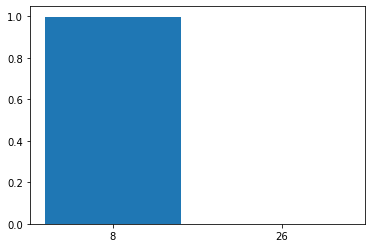

None
YZZZZZXZ YXIII


AssertionError: None

In [18]:
print(mol_circ.sim_qubits(num_sim_q))
mol_circ.build_circuit(proj_anz, num_sim_q).draw()

In [ ]:
cs_vqe_results = mol_circ.CS_VQE(proj_anz, num_sim_q)
diff = [v-cs_vqe_results['target'] for v in cs_vqe_results['values']]
plt.title('CS-VQE convergence'), plt.xlabel('Optimisation count'), plt.ylabel('Energy (Ha)')
plt.plot(cs_vqe_results['counts'], diff)
plt.hlines(0.0016, 0, cs_vqe_results['counts'][-1], color='orange')
plt.hlines(0, 0, cs_vqe_results['counts'][-1], color='green')
#plt.ylim(0, 0.01)

In [ ]:
mol_circ.HF_config

In [ ]:
mol_circ.reference_state()

/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


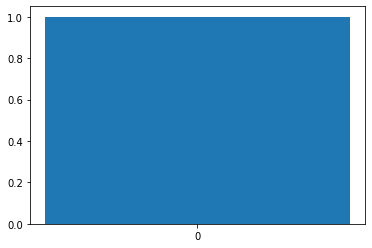

None
      ░ ┌─────┐┌───┐┌──────────┐┌───┐┌───┐ ░  ░ ┌─────┐┌───┐┌──────────┐┌───┐»
q_0: ─░─┤ SDG ├┤ H ├┤ RZ(P[0]) ├┤ H ├┤ S ├─░──░─┤ SDG ├┤ H ├┤ RZ(P[0]) ├┤ H ├»
      ░ └─────┘└───┘└──────────┘└───┘└───┘ ░  ░ └─────┘└───┘└──────────┘└───┘»
«     ┌───┐ ░ ┌───────┐
«q_0: ┤ S ├─░─┤ RZ(b) ├
«     └───┘ ░ └───────┘


/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


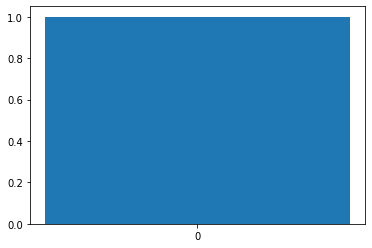

None
      ░ ┌─────┐┌───┐                      ┌───┐┌───┐ ░  ░ ┌─────┐┌───┐»
q_0: ─░─┤ SDG ├┤ H ├──■────────────────■──┤ H ├┤ S ├─░──░─┤ SDG ├┤ H ├»
      ░ └─────┘└───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘└───┘ ░  ░ └─────┘└───┘»
q_1: ─░─────────────┤ X ├┤ RZ(P[0]) ├┤ X ├───────────░──░─────────────»
      ░             └───┘└──────────┘└───┘           ░  ░             »
«     ┌──────────┐┌───┐┌───┐ ░  ░ ┌─────┐┌───┐                      ┌───┐┌───┐»
«q_0: ┤ RZ(P[1]) ├┤ H ├┤ S ├─░──░─┤ SDG ├┤ H ├──■────────────────■──┤ H ├┤ S ├»
«     └──────────┘└───┘└───┘ ░  ░ └─────┘└───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘└───┘»
«q_1: ───────────────────────░──░─────────────┤ X ├┤ RZ(P[0]) ├┤ X ├──────────»
«                            ░  ░             └───┘└──────────┘└───┘          »
«      ░  ░ ┌─────┐┌───┐┌──────────┐┌───┐┌───┐ ░ 
«q_0: ─░──░─┤ SDG ├┤ H ├┤ RZ(P[1]) ├┤ H ├┤ S ├─░─
«      ░  ░ └─────┘└───┘└──────────┘└───┘└───┘ ░ 
«q_1: ─░──░────────────────────────────────────░─
«      ░  ░                        

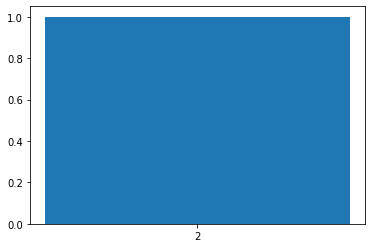

None
           ░                                              ░  ░             »
q_0: ──────░──────────────────────────────────────────────░──░─────────────»
     ┌───┐ ░  ┌───┐                            ┌───┐      ░  ░ ┌─────┐┌───┐»
q_1: ┤ X ├─░──┤ H ├────────■────────────────■──┤ H ├──────░──░─┤ SDG ├┤ H ├»
     └───┘ ░ ┌┴───┴┐┌───┐┌─┴─┐┌──────────┐┌─┴─┐├───┤┌───┐ ░  ░ └┬───┬┘└───┘»
q_2: ──────░─┤ SDG ├┤ H ├┤ X ├┤ RZ(P[0]) ├┤ X ├┤ H ├┤ S ├─░──░──┤ H ├──────»
           ░ └─────┘└───┘└───┘└──────────┘└───┘└───┘└───┘ ░  ░  └───┘      »
«                                                ░  ░ ┌─────┐┌───┐          »
«q_0: ──■──────────────────────────■─────────────░──░─┤ SDG ├┤ H ├──■───────»
«     ┌─┴─┐                      ┌─┴─┐┌───┐┌───┐ ░  ░ └─────┘└───┘┌─┴─┐     »
«q_1: ┤ X ├──■────────────────■──┤ X ├┤ H ├┤ S ├─░──░─────────────┤ X ├──■──»
«     └───┘┌─┴─┐┌──────────┐┌─┴─┐├───┤└───┘└───┘ ░  ░             └───┘┌─┴─┐»
«q_2: ─────┤ X ├┤ RZ(P[1]) ├┤ X ├┤ H ├───────────░──░─────────────

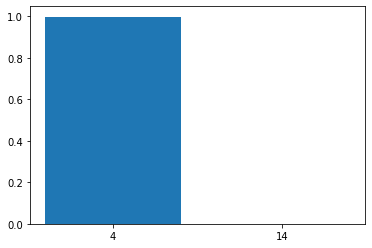

None
           ░                                              ░  ░             »
q_0: ──────░──────────────────────────────────────────────░──░─────────────»
           ░                                              ░  ░             »
q_1: ──────░──────────────────────────────────────────────░──░─────────────»
     ┌───┐ ░  ┌───┐                            ┌───┐      ░  ░ ┌─────┐┌───┐»
q_2: ┤ X ├─░──┤ H ├────────■────────────────■──┤ H ├──────░──░─┤ SDG ├┤ H ├»
     └───┘ ░ ┌┴───┴┐┌───┐┌─┴─┐┌──────────┐┌─┴─┐├───┤┌───┐ ░  ░ └┬───┬┘└───┘»
q_3: ──────░─┤ SDG ├┤ H ├┤ X ├┤ RZ(P[0]) ├┤ X ├┤ H ├┤ S ├─░──░──┤ H ├──────»
           ░ └─────┘└───┘└───┘└──────────┘└───┘└───┘└───┘ ░  ░  └───┘      »
«                                                ░  ░                  »
«q_0: ──■──────────────────────────■─────────────░──░──────────────────»
«       │                          │             ░  ░  ┌───┐           »
«q_1: ──┼──────────────────────────┼─────────────░──░──┤ H ├───■───────»
«     ┌─┴─

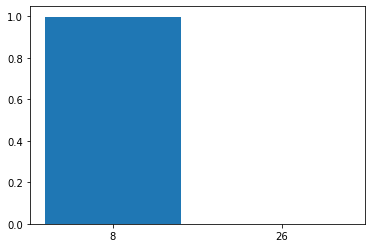

None
           ░                                              ░  ░             »
q_0: ──────░──────────────────────────────────────────────░──░─────────────»
           ░                                              ░  ░             »
q_1: ──────░──────────────────────────────────────────────░──░─────────────»
           ░                                              ░  ░             »
q_2: ──────░──────────────────────────────────────────────░──░─────────────»
     ┌───┐ ░  ┌───┐                            ┌───┐      ░  ░ ┌─────┐┌───┐»
q_3: ┤ X ├─░──┤ H ├────────■────────────────■──┤ H ├──────░──░─┤ SDG ├┤ H ├»
     └───┘ ░ ┌┴───┴┐┌───┐┌─┴─┐┌──────────┐┌─┴─┐├───┤┌───┐ ░  ░ └┬───┬┘└───┘»
q_4: ──────░─┤ SDG ├┤ H ├┤ X ├┤ RZ(P[0]) ├┤ X ├┤ H ├┤ S ├─░──░──┤ H ├──────»
           ░ └─────┘└───┘└───┘└──────────┘└───┘└───┘└───┘ ░  ░  └───┘      »
«                                                ░  ░                       »
«q_0: ──■──────────────────────────■─────────────░──░─────────────────

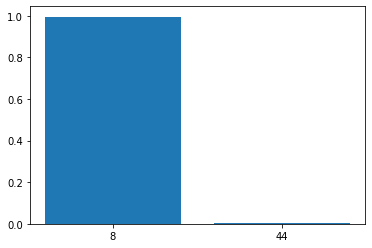

None
           ░                                              ░  ░             »
q_0: ──────░──────────────────────────────────────────────░──░─────────────»
           ░                                              ░  ░             »
q_1: ──────░──────────────────────────────────────────────░──░─────────────»
           ░                                              ░  ░             »
q_2: ──────░──────────────────────────────────────────────░──░─────────────»
     ┌───┐ ░  ┌───┐                            ┌───┐      ░  ░ ┌─────┐┌───┐»
q_3: ┤ X ├─░──┤ H ├────────■────────────────■──┤ H ├──────░──░─┤ SDG ├┤ H ├»
     └───┘ ░ ┌┴───┴┐┌───┐┌─┴─┐┌──────────┐┌─┴─┐├───┤┌───┐ ░  ░ └┬───┬┘└───┘»
q_4: ──────░─┤ SDG ├┤ H ├┤ X ├┤ RZ(P[0]) ├┤ X ├┤ H ├┤ S ├─░──░──┤ H ├──────»
           ░ └─────┘└───┘└───┘└──────────┘└───┘└───┘└───┘ ░  ░  └───┘      »
q_5: ──────░──────────────────────────────────────────────░──░─────────────»
           ░                                              ░  ░         

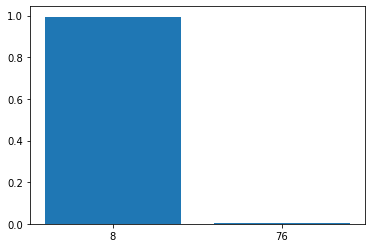

None
           ░                                                        ░  ░ »
q_0: ──────░──────────■────────────────────────────────────■────────░──░─»
           ░          │                                    │        ░  ░ »
q_1: ──────░──────────┼────────────────────────────────────┼────────░──░─»
           ░          │                                    │        ░  ░ »
q_2: ──────░──────────┼────────────────────────────────────┼────────░──░─»
     ┌───┐ ░          │                                    │        ░  ░ »
q_3: ┤ X ├─░──────────┼────────────────────────────────────┼────────░──░─»
     └───┘ ░  ┌───┐ ┌─┴─┐                                ┌─┴─┐┌───┐ ░  ░ »
q_4: ──────░──┤ H ├─┤ X ├──■──────────────────────────■──┤ X ├┤ H ├─░──░─»
           ░  └───┘ └───┘┌─┴─┐                      ┌─┴─┐└───┘└───┘ ░  ░ »
q_5: ──────░─────────────┤ X ├──■────────────────■──┤ X ├───────────░──░─»
           ░ ┌─────┐┌───┐└───┘┌─┴─┐┌──────────┐┌─┴─┐├───┤┌───┐      ░  ░ »
q_6: ──────░─┤ SDG ├

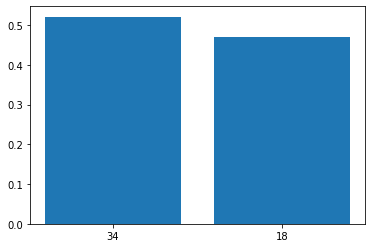

None
           ░                                                                 »
q_0: ──────░───────────────■─────────────────────────────────────────────────»
     ┌───┐ ░ ┌─────┐┌───┐┌─┴─┐                                               »
q_1: ┤ X ├─░─┤ SDG ├┤ H ├┤ X ├──■────────────────────────────────────────────»
     └───┘ ░ └─────┘└───┘└───┘┌─┴─┐                                          »
q_2: ──────░──────────────────┤ X ├──■───────────────────────────────────────»
           ░                  └───┘┌─┴─┐                                     »
q_3: ──────░───────────────────────┤ X ├──■──────────────────────────────────»
     ┌───┐ ░                       └───┘┌─┴─┐                                »
q_4: ┤ X ├─░────────────────────────────┤ X ├──■──────────────────────────■──»
     └───┘ ░ ┌─────┐┌───┐               └───┘┌─┴─┐                      ┌─┴─┐»
q_5: ──────░─┤ SDG ├┤ H ├────────────────────┤ X ├──■────────────────■──┤ X ├»
           ░ └─────┘└───┘                    └─

In [30]:
X = list(range(1, num_qubits+1))
Y1 = []
Y2 = []
for i in X:
    Y1.append(len(mol_circ.project_anz_terms(uccsd, i)))
    Y2.append(mol_circ.build_circuit(uccsd, i).depth())

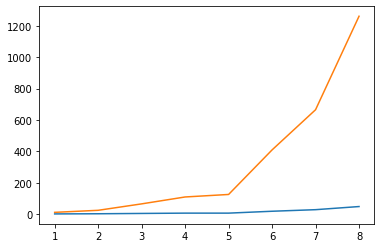

In [31]:
plt.plot(X, Y1)
plt.plot(X, Y2)

In [26]:
mol_circ.project_anz_terms(uccsd, 8)

{'YIYZZZYZ': 0.0002555104886363076j,
 'YZXIIIIZ': 0.006355255773790084j,
 'XZYIIIZZ': -0.006360390047795447j,
 'YXXYZZYI': -0.00026027273862229866j,
 'YYYXIIII': 0.0064737061625832456j,
 'YYXXZZYZ': -0.00026027273862229866j,
 'YXYYIIIZ': 0.0064737061625832456j,
 'XXYXIIZZ': 0.006478936130101781j,
 'XYYYIIZI': -0.006478936130101781j,
 'YYYYZZYZ': 0.00026027273862229866j,
 'YXXXIIIZ': -0.0064737061625832456j,
 'YXYXZZYI': -0.00026027273862229866j,
 'YYXYIIII': 0.0064737061625832456j,
 'XYXXIIZI': 0.006478936130101781j,
 'XXXYIIZZ': 0.006478936130101781j,
 'IYZXIIII': 0.006360390047795447j,
 'IXZYIIIZ': 0.006360390047795447j,
 'YIIIYZYZ': 0.00010627185996791812j,
 'YZZZXIIZ': 0.002643276427739381j,
 'XZZZYIZZ': -0.002645411873728495j,
 'YXZZXYYI': -8.260494616296934e-05j,
 'YYIIYXII': 0.002054614524232223j,
 'YYZZXXYZ': -8.260494616296934e-05j,
 'YXIIYYIZ': 0.002054614524232223j,
 'XXIIYXZZ': 0.0020562744029716928j,
 'XYIIYYZI': -0.0020562744029716928j,
 'YYZZYYYZ': 8.260494616296934e-05j